# Artificial Neural Network (ANN)

This notebook has been realised following guides: <br>
1) Sanjay.M (https://towardsdatascience.com/neural-net-from-scratch-using-numpy-71a31f6e3675) <br>
2) Omar U. Florez guides (https://medium.com/towards-artificial-intelligence/one-lego-at-a-time-explaining-the-math-of-how-neural-networks-learn-with-implementation-from-scratch-39144a1cf80) <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score
from IPython.display import Image
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imageio
import shutil

## Initiation of neural network layers

In [2]:
# Arguments:
# X -- input dataset of shape (input size, number of examples)
# Y -- labels of shape (output size, number of examples)

# Returns:
# n_x -- the size of the input layer
# n_h -- the size of the hidden layer
# n_y -- the size of the output layer

def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer`
    n_y =Y.shape[0] # size of output layer
    return (n_x, n_y)

In [3]:
# Argument:
# n_x -- size of the input layer
# n_h -- size of the hidden layer
# n_y -- size of the output layer

# Returns:
# params -- python dictionary containing your parameters:
#                 W1 -- weight matrix of shape (n_h, n_x)
#                 b1 -- bias vector of shape (n_h, 1)
#                 W2 -- weight matrix of shape (n_y, n_h)
#                 b2 -- bias vector of shape (n_y, 1)

def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Activation Function

In [8]:
# Compute the sigmoid of x

# Arguments:
# x -- A scalar or numpy array of any size.

# Return:
# s -- sigmoid(x) 

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

## Forward Propagation

In [4]:
# Argument:
# X -- input data of size (n_x, m)
# parameters -- python dictionary containing your parameters (output of initialization function)

# Returns:
# A2 -- The sigmoid output of the second activation
# cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"

def forward_propagation(X, parameters):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Cost Function (Binary CrossEntropy)

In [5]:
# Arguments:
# A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
# Y -- "true" labels vector of shape (1, number of examples)
# parameters -- python dictionary containing your parameters W1, b1, W2 and b2

# Returns:
# cost -- cross-entropy loss function

def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

## Backward Propagation

In [6]:
# Implement the backward propagation using the instructions above.

# Arguments:
# parameters -- python dictionary containing our parameters 
# cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
# X -- input data of shape (2, number of examples)
# Y -- "true" labels vector of shape (1, number of examples)

# Returns:
# grads -- python dictionary containing your gradients with respect to different parameters

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

## Updating Parameters

In [7]:
# Updates parameters using the gradient descent update rule given above

# Arguments:
# parameters -- python dictionary containing your parameters 
# grads -- python dictionary containing your gradients 

# Returns:
# parameters -- python dictionary containing your updated parameters 


def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Model Class Predictions

In [9]:
# Using the learned parameters, predicts a class for each example in X

# Arguments:
# parameters -- python dictionary containing your parameters 
# X -- input data of size (n_x, m)

# Returns
# predictions -- vector of predictions of our model (red: 0 / blue: 1)

def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    
    return predictions

## Plotting Functions

In [10]:
def plot_decision_boundary(X, y_actual, model, save_filepath=None, text=None):

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, 
                                                            y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y_actual, cmap=plt.cm.Spectral)
    
    if text:
        plt.text(-3, 10.2, text, fontsize=14)
    if save_filepath == None:
        plt.show()
    else:
        plt.savefig(save_filepath)
    plt.close()
    
def plot_function(losses, save_filepath=None, ylabel=None, title=None):
    plt.figure()
    t = [x[0] for x in losses]
    loss = [x[1] for x in losses]

    plt.figure()
    plt.plot(t, loss, 'b')
    plt.xlabel('Batch #')
    plt.ylabel(ylabel if ylabel else '')
    if title:
        plt.title(title)

    if save_filepath == None:
        plt.show()
    else:
        plt.savefig(save_filepath)
    plt.close()
    
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

def make_all_gif(input_folder, save_filepath):
    time_per_step = 0.25
    for root, _, files in os.walk(os.path.join(input_folder, 'accuracy')):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
    file_names = [os.path.basename(file) for file in file_paths]

    episode_frames_accuracy = [imageio.imread(os.path.join(input_folder, 'accuracy',file_name)) for file_name in
                               file_names if file_name.endswith('.png')]
    episode_frames_boundary = [imageio.imread(os.path.join(input_folder, 'boundary', file_name)) for file_name in
                               file_names if file_name.endswith('.png')]
    episode_frames_loss = [imageio.imread(os.path.join(input_folder, 'loss', file_name)) for file_name in
                           file_names if file_name.endswith('.png')]

    assert(len(episode_frames_accuracy)==len(episode_frames_boundary)==len(episode_frames_loss))

    episode_frames = []
    for i in range(len(episode_frames_accuracy)):
        plt.figure()
        fig, axes = plt.subplots(1, 3, figsize=(20,5))
        #fig.subplots_adjust(hspace=1, wspace=1)

        ax = axes.flat[0]
        ax.imshow(episode_frames_accuracy[i], interpolation='none')
        ax.set_axis_off()
        ax.set_aspect('equal')

        ax = axes.flat[1]
        ax.imshow(episode_frames_boundary[i], interpolation='none')
        ax.set_axis_off()
        ax.set_aspect('equal')

        ax = axes.flat[2]
        ax.imshow(episode_frames_loss[i], interpolation='none')
        ax.set_axis_off()
        ax.set_aspect('equal')

        fig.tight_layout()
        plt.suptitle('Step = %d' %i, fontsize=18)
        plt.axis('off')
        plt.savefig(os.path.join(input_folder, 'all', 'image_%d.png'%i), dpi = 200)
        plt.close()

        image = imageio.imread(os.path.join(input_folder, 'all', 'image_%d.png'%i))
        episode_frames.append(image)

    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

## Complete ANN training model

In [11]:
# Arguments:
# X -- dataset of shape (2, number of examples)
# Y -- labels of shape (1, number of examples)
# n_h -- size of the hidden layer
# num_iterations -- Number of iterations in gradient descent loop
# print_cost -- if True, print the cost every 1000 iterations

# Returns:
# parameters -- parameters learnt by the model. They can then be used to predict.

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    y_list = [val for sublist in y for val in sublist]
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    losses = []
    accuracies = []
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        losses.append([i,cost])

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            A2, cache = forward_propagation(X,parameters)
            predictions = A2 > 0.5
            acc = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) 
            #print ('Accuracy: %d' % acc + '%')
            accuracies.append([i, acc])
            print('Epoch %d\tLoss: %f Accuracy: %f' %(i, cost, acc))
            save_filepath = './scratch_mlp/plots/boundary/image_%d.png'%i
            text = 'Batch #: %d    Accuracy: %.2f    Loss value: %.2f'%(i, acc, cost)
            plot_decision_boundary(X, y_list, lambda x: predict(parameters, x.T),
                                         save_filepath=save_filepath, text = text)
            save_filepath = './scratch_mlp/plots/loss/image_%d.png' % i
            plot_function(losses, save_filepath=save_filepath, ylabel='Loss', title='Loss estimation')
            save_filepath = './scratch_mlp/plots/accuracy/image_%d.png' % i
            plot_function(accuracies, save_filepath=save_filepath, ylabel='Accuracy', title='Accuracy estimation')
                
    return parameters

## ANN Training GIF

In [12]:
dataset_len = 200
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(2,2,dlen))
X_12 = pd.Series(np.random.normal(4,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(1,3,dlen))
X_22 = pd.Series(np.random.normal(2,3,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, Y], axis=1)
df.columns = ['X1', 'X2', 'Y']

X = df.drop(['Y'], axis=1).values
y = df['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2)

X, y = X.T, y.values.reshape(1, y.shape[0])

In [13]:
n_h = 7
parameters = nn_model(X, y, n_h, num_iterations = 25000, print_cost=True)

Epoch 0	Loss: 0.693090 Accuracy: 57.500000
Epoch 1000	Loss: 0.550829 Accuracy: 75.000000
Epoch 2000	Loss: 0.518712 Accuracy: 75.500000
Epoch 3000	Loss: 0.499997 Accuracy: 77.000000
Epoch 4000	Loss: 0.494223 Accuracy: 77.000000
Epoch 5000	Loss: 0.491703 Accuracy: 77.500000
Epoch 6000	Loss: 0.490332 Accuracy: 77.000000
Epoch 7000	Loss: 0.489334 Accuracy: 78.000000
Epoch 8000	Loss: 0.484231 Accuracy: 78.000000
Epoch 9000	Loss: 0.480351 Accuracy: 77.500000
Epoch 10000	Loss: 0.477184 Accuracy: 78.000000
Epoch 11000	Loss: 0.474469 Accuracy: 77.500000
Epoch 12000	Loss: 0.472941 Accuracy: 78.000000
Epoch 13000	Loss: 0.472272 Accuracy: 78.000000
Epoch 14000	Loss: 0.471478 Accuracy: 78.000000
Epoch 15000	Loss: 0.470678 Accuracy: 77.500000
Epoch 16000	Loss: 0.469943 Accuracy: 78.000000
Epoch 17000	Loss: 0.469280 Accuracy: 78.000000
Epoch 18000	Loss: 0.468683 Accuracy: 78.000000


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch 19000	Loss: 0.468144 Accuracy: 78.000000
Epoch 20000	Loss: 0.467655 Accuracy: 78.000000
Epoch 21000	Loss: 0.467209 Accuracy: 78.000000
Epoch 22000	Loss: 0.466800 Accuracy: 78.000000
Epoch 23000	Loss: 0.466423 Accuracy: 78.000000
Epoch 24000	Loss: 0.466075 Accuracy: 78.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

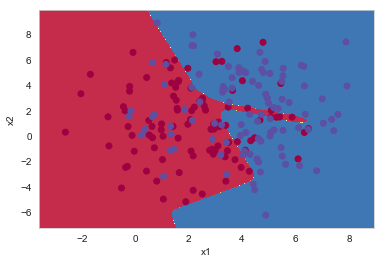

In [14]:
# Plot the final training decision boundary
y_list = [val for sublist in y for val in sublist]
plot_decision_boundary(X, y_list, lambda x: predict(parameters, x.T))

In [15]:
save_filepath = './scratch_mlp/plots/gif/boundary.gif'
make_gif('./scratch_mlp/plots/boundary/', save_filepath)
save_filepath = './scratch_mlp/plots/gif/loss.gif'
make_gif('./scratch_mlp/plots/loss/', save_filepath)
save_filepath = './scratch_mlp/plots/gif/accuracy.gif'
make_gif('./scratch_mlp/plots/accuracy/', save_filepath)

input_folder = './scratch_mlp/plots/'
save_filepath = './scratch_mlp/plots/gif/all.gif'
make_all_gif(input_folder, save_filepath)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#### Output:
![33](./scratch_mlp/plots/gif/all.gif)